<a href="https://colab.research.google.com/github/microprediction/timemachines/blob/main/wiggling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima
!pip install sktime
!pip install statsforecast
!pip install --upgrade git+https://github.com/microprediction/timemachines.git

# How to wiggle a timeseries model
Just a little demo related to [Smooth Move - Does Wiggling Make Time-Series Models Less Acurate?](https://medium.com/p/8544e675873). 

### Step 1: Choose a skater, and a wiggled version of the same
A "skater" is a one-line forecasting function. Yeah, I know some of you prefer twenty lines of ceremony but anyway...

In [2]:
from timemachines.skaters.sk.skautoarima import sk_autoarima as f
from timemachines.skaters.sk.sfautoarimawiggly import sf_autoarima_wiggly_median_d05_m3 as g

### Step 2: Let's see if it helps make things more regular

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


{'ar': 2,
 'ar_true': 2,
 'exog': 0,
 'exog_variance': 0,
 'ma': 2,
 'ma_true': 2,
 'measurement_variance': 0,
 'reduced_ar': 2,
 'reduced_ma': 2,
 'seasonal_ar': 0,
 'seasonal_ma': 0,
 'trend': 1,
 'variance': 1}
Comparing ...


/usr/local/lib/python3.7/dist-packages/statsforecast/arima.py:1020: RuntimeWarning: invalid value encountered in sqrt
  return any(np.isnan(np.sqrt(np.diag(obj['var_coef']))))
/usr/local/lib/python3.7/dist-packages/statsforecast/arima.py:1020: RuntimeWarning: invalid value encountered in sqrt
  return any(np.isnan(np.sqrt(np.diag(obj['var_coef']))))
/usr/local/lib/python3.7/dist-packages/statsforecast/arima.py:1020: RuntimeWarning: invalid value encountered in sqrt
  return any(np.isnan(np.sqrt(np.diag(obj['var_coef']))))
/usr/local/lib/python3.7/dist-packages/statsforecast/arima.py:1020: RuntimeWarning: invalid value encountered in sqrt
  return any(np.isnan(np.sqrt(np.diag(obj['var_coef']))))
/usr/local/lib/python3.7/dist-packages/statsforecast/arima.py:1020: RuntimeWarning: invalid value encountered in sqrt
  return any(np.isnan(np.sqrt(np.diag(obj['var_coef']))))
/usr/local/lib/python3.7/dist-packages/statsforecast/arima.py:1020: RuntimeWarning: invalid value encountered in sqrt
  

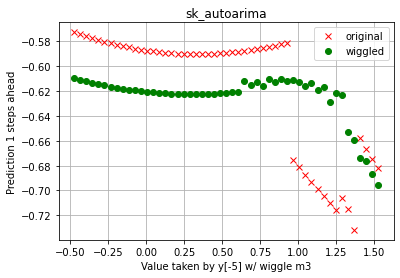

In [8]:
from timemachines.skatertools.data.ornstein import simulate_arima_like_path
from timemachines.skatertools.sensitivity.skatersensitivity import skater_bump


def skater_bump_plot(f, g, ndx, k):
    """ Plot sensitivity to k'th to last observation,
        and compare to an alternative skater g that might be smoother
    """
    import numpy as np
    ys = simulate_arima_like_path(seq_len=50)
    y_final, x_final = skater_bump(ys=ys, f=f, ndx=ndx, k=k)
    discont_max = np.max(np.diff(np.array(x_final)))
    discont_median = np.median(np.abs(np.diff(np.array(x_final))))
    if discont_max>5*discont_median:
        print('Comparing ...')
        y_alt, x_alt = skater_bump(ys=ys, f=g, ndx=ndx, k=k)
        import matplotlib.pyplot as plt
        plt.plot(y_final,x_final, 'rx')
        plt.plot(y_alt, x_alt, 'go')
        plt.ylabel('Prediction '+str(k)+' steps ahead')
        kstub = g.__name__.split('_')[-1]
        plt.xlabel('Value taken by y['+str(ndx)+'] w/ wiggle '+kstub)
        plt.grid()
        plt.title(f.__name__)
        plt.legend(['original','wiggled'])
        plt.show()
        import time

skater_bump_plot(f=f, g=g, ndx=-5, k=1)

## Step 3: Buy this [book](https://mitpress.mit.edu/9780262047326/microprediction/)
I hear it is fantastic. 